Ce projet consiste à prédire la direction du prix d'une action pendant les deux dernières heures de trading (14H-16H), en utilisant les données du début de journée. 14h - 16h est la période la plus liquide, avec des transactions importantes. Prédire le mouvement des prix permet d'optimiser un portefeuille en ajustant ses positions stratégiquement.

Les trois directions possibles :
- Baisse franche du prix
- Évolution mineure (peu de variation, quelle que soit la direction)
-Hausse franche du prix

L'objectif est d'utiliser des modèles prédictifs pour anticiper ces mouvements.

# Data

In [86]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
pip install ace-tools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ta
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
!pip install ace-tools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import kruskal

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import hdbscan
from sklearn.metrics import accuracy_score

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [ ]:
input_train = pd.read_csv("C:/Users/arian/OneDrive/Bureau/FAC M2/Machin learning/PROJET/input_training.csv")
output_train = pd.read_csv("C:/Users/arian/OneDrive/Bureau/FAC M2/Machin learning/PROJET/output_training_gmEd6Zt.csv")

In [97]:
 # Fusionner les X et le Y dans un meme fichier
data = input_train.merge(output_train, on="ID")

Les données :
- Les rendements. Ils ont une granularité de 5 minutes. Par exemple r0 : rendement entre les prix de 9h30 et 9h35. Jusqu'a r52 : rendement entre les prix de 13h55 et 14h. Les rendements sont calculés en points de base.
- Day : Identifiant du jour correspondant aux rendements intrajournaliers d'une action. Point important : on ne retrouve aucun jour du set d'entrainement dans le set de test pour eviter les fuites d'info. On a 502 journées donc environ 2 ans de données de trading
- Equity : identifiant de l'action concernée. De meme on ne retrouve aucune action du set d'entrainement dans le set de test

Reod : variable cible
- si le rendement calculé en point de base entre 14h et 16h est inferieur à -25 bps : reod prend la valeur -1
- Entre -25 et 25 bps : prend la valeur 0
- Superieur à 25 bps : prend la valeur 1

# Nettoyage et test de significativité des features

## Traitement des valeurs manquantes

In [98]:
#nombre de NA par colonne
print(data.isna().sum())
# pourcentage de NaN par colonne
print(data.isna().mean() * 100)

ID             0
day            0
equity         0
r0         45823
r1         96815
r2        102470
r3         94169
r4         93730
r5         95458
r6         91521
r7         86132
r8         90078
r9         89930
r10        88811
r11        90961
r12        88741
r13        84668
r14        81494
r15        85392
r16        83635
r17        85174
r18        84637
r19        85320
r20        86579
r21        86546
r22        84936
r23        86346
r24        86416
r25        86720
r26        88874
r27        89098
r28        87287
r29        89571
r30        90291
r31        90028
r32        92840
r33        91486
r34        89849
r35        92205
r36        90539
r37        91034
r38        92469
r39        91983
r40        90007
r41        91669
r42       100777
r43       100894
r44       102595
r45       101842
r46        99986
r47       100517
r48       100084
r49        98510
r50        99645
r51        99354
r52        96784
reod           0
dtype: int64
ID         0.00000

In [99]:
print(data.isna().sum(axis=1))

0         29
1          0
2          0
3         39
4          0
          ..
843294     0
843295     0
843296     0
843297     0
843298     0
Length: 843299, dtype: int64


Les valeurs manquantes se trouvent exclusivement dans les rendements. On supprime les lignes qui contiennent plus de 30% de valeurs manquantes.

In [100]:
data = data.dropna(axis=0, thresh = data.shape[1] * 0.7)

Lorsqu'une valeur de rendement est manquante, on la remplace par le dernier rendement disponible précédemment. Si c'est la premiere valeur qui est manquante, on la remplace par le rendement suivant.

In [101]:
# colonnes de rendements
return_cols = [col for col in data.columns if col.startswith('r') and col != 'reod']
data[return_cols] = data[return_cols].bfill(axis=0).ffill(axis=0)

On regarde quelle est la répartition des valeurs dans reod.

In [102]:
value_counts = data['reod'].value_counts()
value_percentages = (value_counts / len(data)) * 100

for value, count in value_counts.items():
    percentage = value_percentages[value]
    print(f"Valeur : {value} | Nombre : {count} | Pourcentage : {percentage:.2f}%")

Valeur : 0 | Nombre : 264990 | Pourcentage : 36.48%
Valeur : -1 | Nombre : 235797 | Pourcentage : 32.46%
Valeur : 1 | Nombre : 225699 | Pourcentage : 31.07%


Les valeurs sont à peu près équitablement réparties.

## Valeurs extrêmes

Nous devons vérifier si nous avons des valeurs extrêmes ou même aberrantes dans les données, plus précisémment dans les rendements.

On regarde combien de rendements sont >100bp ou < 100bp, ce qui correspond à une hausse/baisse de plus d'1% en 5 min.

On regarde aussi les valeurs min et max pour voir si elles sont élevées mais cohérentes économiquement, ou s'il peut y avoir des valeurs totalement aberrantes.

In [103]:
# les rendements
rendement_cols = [col for col in data.columns if col.startswith("r") and col != "reod"]

# on les met tous dans une série
stacked_rendements = data[["ID"] + rendement_cols].set_index("ID").stack().reset_index()
stacked_rendements.columns = ["ID", "colonne", "valeur"]

# on les groupe en fonction de < 100 ; > 100 ou compris entre -100 et 100
rendements = stacked_rendements["valeur"]
groupe_A = rendements[(rendements >= -100) & (rendements <= 100)].count()
groupe_B = rendements[rendements < -100].count()
groupe_C = rendements[rendements > 100].count()
total = len(rendements)

print("Répartition des rendements (en bps) :")
print(f"Rendements compris entre [-100 ; 100] : {groupe_A} observations ({groupe_A/total:.2%})")
print(f"Rendements < -100: {groupe_B} observations ({groupe_B/total:.2%})")
print(f"Rendements > 100: {groupe_C} observations ({groupe_C/total:.2%})")
print(f"Rendements extrêmes: {(groupe_B + groupe_C)/total:.2%}")

# top 5 plus élevés et plus faibles
top_5 = stacked_rendements.sort_values("valeur", ascending=False).head(5)
bottom_5 = stacked_rendements.sort_values("valeur", ascending=True).head(5)
print("\n 5 rendements les plus élevés :")
print(top_5)
print("\n 5 rendements les plus faibles :")
print(bottom_5)

Répartition des rendements (en bps) :
Rendements compris entre [-100 ; 100] : 37967191 observations (98.61%)
Rendements < -100: 281976 observations (0.73%)
Rendements > 100: 254591 observations (0.66%)
Rendements extrêmes: 1.39%

 5 rendements les plus élevés :
              ID colonne       valeur
21662213  474460      r0  431070000.0
16382883  358758      r0  221060000.0
11514038  252237      r0  164090000.0
10633973  232906      r0  103900000.0
1353356    29665      r1   75160000.0

 5 rendements les plus faibles :
              ID colonne   valeur
36050442  789564      r1 -9973.54
23639114  517712      r1 -9971.65
26754878  585884      r1 -9967.80
26754877  585884      r0 -9967.67
36221791  793335      r1 -9948.13


Le pourcentage de rendements extrêmes est correct : cela peut correspondre à des jours d'annonce, de publication, de stress de marché etc. Par contre on a des valeurs extrêmes totalement aberrantes, qu'il faut traiter.

On va supprimer tous les rendements supérieurs à une variation de + de 15%. Cela nous laisse assez de marge pour prendre quand même en compte de gros mouvements de marchés, tout en restant dans l'ordre du possible.

In [104]:
#supprimer les rendements extrêmes
data[rendement_cols] = data[rendement_cols].where((data[rendement_cols] >= -1500) & (data[rendement_cols] <= 1500))

# remplacer les NAN par la valeur précédente si elle existe
data[rendement_cols] = data[rendement_cols].apply(lambda row: row.ffill(), axis=1)

# pour les rendements NAN qui n'ont pas de valeur précédente, on remplace par la valeur suivante
data[rendement_cols] = data[rendement_cols].apply(lambda row: row.bfill(), axis=1)

On trace la distribution des rendements nettoyés.

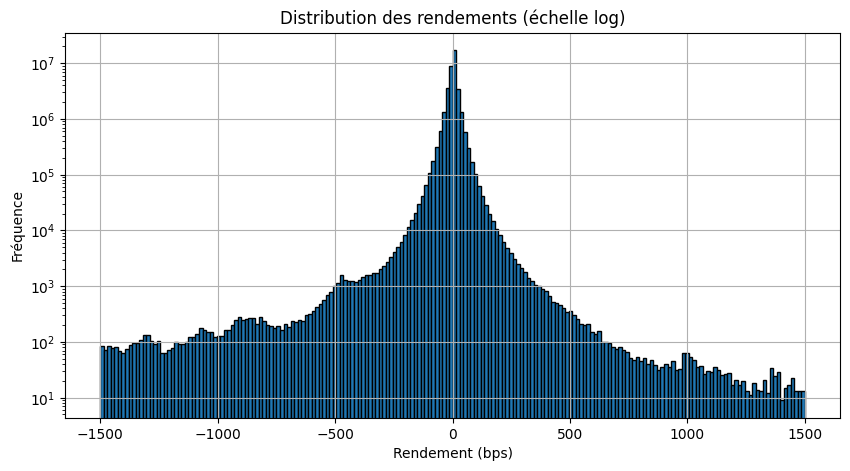

In [105]:
rendements_serie = data[rendement_cols].stack().dropna()
plt.figure(figsize=(10, 5))
plt.hist(rendements_serie, bins=200, edgecolor='black')
plt.title("Distribution des rendements (échelle log)")
plt.xlabel("Rendement (bps)")
plt.ylabel("Fréquence")
plt.yscale("log")
plt.grid(True)
plt.show()

In [106]:
mean_val = rendements_serie.mean()
std_val = rendements_serie.std()
skew_val = skew(rendements_serie)
kurt_val = kurtosis(rendements_serie, fisher=False)

print("\nMoments statistiques des rendements (en bps) :")
print(f"Moyenne: {mean_val:.2f}")
print(f"Ecart-type: {std_val:.2f}")
print(f"Skewness: {skew_val:.4f}")
print(f"Kurtosis: {kurt_val:.2f}")


Moments statistiques des rendements (en bps) :
Moyenne: -0.42
Ecart-type: 34.53
Skewness: -5.2955
Kurtosis: 273.96


- La moyenne est quasi nulle, ce qui signifie que la distribution est quasiment centrée.
- L'écart-type représente une volatilité raisonnable (0.3452 % en 5 minutes). C'est cohérent pour des horizons aussi courts.
- Le Skew est négatif, donc on a une forte asymétrie à gauche, ce qui veut dire que les grosses baisses sont plus fréquents que les fortes hausses. C'est normal car le marché baisse toujours beaucoup plus rapidement qu'il ne monte (effet de panique).

- Le Kurtosis est très positif : on a des queues de distribution beaucoup plus épaisses que celles d'une loi Normale.

## Corrélation entre les features et la cible

- Pour des features continues ( les rendements ), on effectue un Test de Krustal-Wallis pour vérifier si la distribution du rendement varie significativement entre les classes de reod.
- Pour les features catégorielles (equity, day), on effectue un test du Chi² pour vérifier si la répartition de la feature catégorielle est significativement différente entre les classes de reod.

### Rendements

Test de Krustal Wallis

In [107]:
features = data.columns[3:-1]  #r0 à r52
p_values = {}

for feature in features:
    groups = [data[data['reod'] == cat][feature] for cat in data['reod'].unique()]
    stat, p = kruskal(*groups)
    p_values[feature] = p

# features non significatives (p >= 0.05)
non_significant_features = [k for k, v in p_values.items() if v is None or v >= 0.05]

print("Features non significatives (p ≥ 0.05) :")
print(non_significant_features)

# trier les features les plus significatives
sorted_features = sorted(p_values.items(), key=lambda x: x[1])
print("Top 10 des features les plus corrélées :")
print(sorted_features[:10])

Features non significatives (p ≥ 0.05) :
['r16', 'r28']
Top 10 des features les plus corrélées :
[('r34', np.float64(3.355064153916731e-89)), ('r26', np.float64(3.7691538247601085e-76)), ('r20', np.float64(5.689020417957507e-41)), ('r13', np.float64(6.634961241720614e-41)), ('r41', np.float64(2.0919327309203081e-35)), ('r31', np.float64(3.3908657206244366e-35)), ('r48', np.float64(5.853733372564561e-34)), ('r29', np.float64(3.844517649423271e-30)), ('r7', np.float64(4.43538639412497e-28)), ('r24', np.float64(4.621047106984938e-24))]


Tous les rendements sont significatifs (sauf deux), c'est à dire qu'ils influent bien sur la variable cible.

### Features catégorielles

In [108]:
#table de contingence (fréquence de reod pour chaque jour)
contingency_table = pd.crosstab(data['day'], data['reod'])

# Test de Chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique Chi² : {chi2:.4f}")
print(f"P-valeur : {p:.8f}")

if p < 0.05:
    print("`day` influence significativement `reod`")
else:
    print("Pas de relation significative entre `day` et `reod`")

Statistique Chi² : 178297.5374
P-valeur : 0.00000000
`day` influence significativement `reod`


Selon le test de Chi2, on rejette l'hypothèse H0 avec certitude. La variable equity influence significativement la variable cible. Cependant, on peut noter que la p-value est nulle, ce qui est étrange. Cela peut potentiellement s'expliquer par le fait que nous avons un nombre de variables important, donc le test de Chi 2 est moins robuste. Nous allons utiliser un V de Cramer pour confirmer le résultat.

In [109]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# V de Cramer entre day et reod
v_cramer = cramers_v(data['day'], data['reod'])
print(f" V de Cramer entre `day` et `reod` : {v_cramer:.4f}")

# V de Cramer entre equity et reod
v_cramer_equity = cramers_v(data['equity'], data['reod'])
print(f" V de Cramer entre `equity` et `reod` : {v_cramer_equity:.4f}")

 V de Cramer entre `day` et `reod` : 0.3503
 V de Cramer entre `equity` et `reod` : 0.1779


Il y a une corrélation significative entre le jour et la variable cible, et entre equity et la variable cible.

On peut aussi regrouper les equity en fonction du reod qui leur est le plus associé. On analyse ensuite dans quelle mesure la variable reod dépend du type d’equity auquel elle appartient.

In [110]:
# Trouver le reod le plus fréquent pour chaque equity
dominant_reod_per_equity = data.groupby('equity')['reod'].agg(lambda x: x.value_counts().idxmax())
equity_reod_group_series = data['equity'].map(dominant_reod_per_equity)

# Calculer le V de Cramer entre cette série temporaire et la vraie variable `reod`
v_cramer = cramers_v(equity_reod_group_series, data['reod'])
print(f"V de Cramer après regroupement : {v_cramer:.4f}")


V de Cramer après regroupement : 0.1335


Le V de Cramer est assez faible pour la variable equity. Cela peut s'expliquer par le fait qu'equity n'est pas une "vraie" variable catégorielle. Plus tard dans le projet, nous utiliserons de l'entrainement non supervisé pour créer des clusters d'equity.

# Benchmark


Nous n'avons pas de description detaillée sur le calcul du benchmark du challenge. On sait qu'il se base sur la création de features basées sur les rendements r0 à r52, qu'il compare le comportement des différentes actions et journées, et utilise un classifieur basique basé sur l’état de l'arbre. Ils obtiennent un score de 41.74%. Le gagnant du challenge a obtenu : 51,93%

On teste un benchmark naif :
-  on regarde si entre 9h30 et 14h, l'action est montée de 25bp, a baissé de 25bp, ou est restée à peu près stable. On les classe ensuite en fonction de ça en +1, -1 et 0.

In [111]:
benchmark = data.copy()

cols_to_keep = ["ID", "day", "equity", "r0", "r52", 'reod']
benchmark = benchmark[cols_to_keep]
benchmark["reod_estimated"] = benchmark["r52"] - benchmark["r0"]
benchmark["reod_estimated"] = benchmark["reod_estimated"].apply(lambda x: 1 if x > 25 else (-1 if x < -25 else 0))

total_percentage = (((benchmark["reod"] == benchmark["reod_estimated"]).sum()) / len(benchmark)) * 100

print(f"Pourcentage de valeurs identiques : {total_percentage:.2f}%")
benchmark.head()

Pourcentage de valeurs identiques : 36.98%


,ID,day,equity,r0,r52,reod,reod_estimated
1,1,272,107,-9.76,26.68,0,1
2,2,323,1063,49.85,15.96,-1,-1
4,4,123,1465,-123.84,43.43,-1,1
5,5,343,1279,-26.91,-5.59,0,0
6,6,212,185,0.00,4.40,-1,0


On trouve un benchmark un peu plus faible que le benchmark de l'énoncé.

# Création de nouvelles features

Nous créons un ensemble de features afin de mieux exploiter notre dataset.

## Nouvelles features

On commence par créer des features découlant des statistiques usuelles :
- moyenne, médiane des rendements sur une journée
- ecart type et variance des rendements sur une journée
- amplitude (difference entre rend max et min de la journée).

Ces calculs sont appliqués par equity.

In [112]:
data['mean_return'] = data.iloc[:, 3:-1].mean(axis=1)
data['median_return'] = data.iloc[:, 3:-1].median(axis=1)
data['std_return'] = data.iloc[:, 3:-1].std(axis=1)
data['var_return'] = data.iloc[:, 3:-1].var(axis=1)
data['range_return'] = data.iloc[:, 3:-1].max(axis=1) - data.iloc[:, 3:-1].min(axis=1)

On calcule ensuite :
- la dynamique des rendements : leur tendance en debut et fin de session, puis on calcule la difference entre les tendances. (pour chaque jour)

- le momentum sur 10min et 20min. S'il est > 0, cela signifie que l’action a tendance à monter dans les dernières minutes avant 14h. (pour chaque jour)

- l'accélération, pour savoir si l'action a tendance a prendre de la vitesse ou à ralentir en fin de session. (pour chaque jour)

- le ratio de volatilité. On compare la volatilité récente par rapport à la volatilité élevée. Si la volatilité a récemment augmenté, ca veut dire que le marché est plus instable vers la fin de la session. (pour chaque jour)

In [113]:
data['trend_last_5'] = data[['r48', 'r49', 'r50', 'r51', 'r52']].mean(axis=1)
data['trend_first_5'] = data[['r0', 'r1', 'r2', 'r3', 'r4']].mean(axis=1)
data['trend_diff'] = data['trend_last_5'] - data['trend_first_5']

data['momentum_10'] = data['r52'] - data['r42']
data['momentum_20'] = data['r52'] - data['r32']
data['acceleration'] = data['momentum_10'] - data['momentum_20']

#on regarde la vol de la derniere demie heure avant 14h, par rapport à la vol totale de la journée.
vol_fin = data[['r47', 'r48', 'r49', 'r50', 'r51', 'r52']].std(axis=1)
vol_totale = data['std_return']
#si tous les rendements de r47 à r52 valent 0, et l'écart type vaut 0 -> nous genere un NAN. on remplace par 0
data['volatility_ratio'] = np.where((vol_fin == 0) & (vol_totale == 0), 0.0, vol_fin / vol_totale)

Le marché a des cycles (effet début/fin de mois, trimestre, etc.) qu'on peut capturer avec une transformation sinusoïdale sur les données de jours.

In [114]:
data['day_sin'] = np.sin(2 * np.pi * data['day'] / max(data['day']))
data['day_cos'] = np.cos(2 * np.pi * data['day'] / max(data['day']))

On peut aussi transformer "day" en catégories temporelles, pour capturer les effets de période. On découpe la variable "day" en quantiles égaux.



In [115]:
data['day_bin'] = pd.qcut(data['day'], q=10, labels=False)

Nous calculons maintenant des features cross-temporelles, c'est à dire sur plusieurs jours de l'échantillon.

Pour chaque equity, nous calculons :
- la moyenne mobile de ses rendements sur 5 jours et 10 jours
- la volatilité rolling sur les mêmes intervalles
- le momentum sur les mêmes intervalles (la différence entre la moyenne des rendements des deux jours formant l'intervalle).
- le ratio de volatilité : le ratio entre la vol. rolling 5 jours et la vol rolling 10 jours.





On regarde déjà si des equity ont moins de 11 jours d'observations car on ne pourrait pas appliquer de rolling window 10 jours dessus.

In [116]:
equity_sizes = data['equity'].value_counts()
equity_to_remove = equity_sizes[equity_sizes < 11]
n_to_drop = equity_to_remove.sum()

print(f"Equity avec nombre d'observations < 11: {len(equity_to_remove)}")
print(f"Nombre total de lignes à supprimer : {n_to_drop}")

Equity avec nombre d'observations < 11: 25
Nombre total de lignes à supprimer : 114


On a très peu d'equity qui ont moins de 11 observations, et en tout ça représente 137 lignes ce qui est très peu vu notre dataset, donc on peut se permettre de les supprimer.

In [117]:
equity_supprimer = equity_sizes[equity_sizes < 11].index
data = data[~data['equity'].isin(equity_supprimer)].reset_index(drop=True)

In [118]:
# colonnes des rendements
return_cols = [col for col in data.columns if col.startswith("r") and col != "reod"]

# Tri par equity et jour
data = data.sort_values(by=['equity', 'day'])

# features rolling
for equity in data['equity'].unique():
    mask = data['equity'] == equity

    mean_return = data.loc[mask, 'mean_return']
    std_return = data.loc[mask, 'std_return']

    # Moyenne mobile
    data.loc[mask, 'Moyenne mobile 5d'] = mean_return.rolling(window=5).mean().shift(1)
    data.loc[mask, 'Moyenne mobile 10d'] = mean_return.rolling(window=10).mean().shift(1)

    # Volatilité mobile
    vol5 = std_return.rolling(window=5).mean().shift(1)
    vol10 = std_return.rolling(window=10).mean().shift(1)

    data.loc[mask, 'Vol mobile 5d'] = vol5
    data.loc[mask, 'Vol mobile 10d'] = vol10

    # Momentum
    data.loc[mask, 'Momentum mobile 5d'] = (mean_return - mean_return.shift(5)).shift(1)
    data.loc[mask, 'Momentum mobile 10d'] = (mean_return - mean_return.shift(10)).shift(1)

    # Vol ratio 10d sécurisé (évite les 0/0)
    vol_ratio = np.where((vol5 == 0) & (vol10 == 0), 0.0, #si division 0/0 alors = 0
        np.where( vol10 == 0,np.nan, vol5 / vol10)) # si numérateur / 0 : non défini. alors = NAN
    data.loc[mask, 'Vol ratio 10d'] = vol_ratio


In [119]:
data = data.dropna()
data = data.drop(columns=['ID'])

# Construction de features avec clustering (modele non supervisé)

## Cluster d'equities sur les features

Auparavant, nous avons essayé de considérer les equity comme des features catégorielles, afin d'analyser leur impact sur la variable cible reod. Cependant, les equity ne sont pas des features catégorielles à proprement parler. Pour bien analyser leur impact sur la variable cible, nous allons créer des clusters d'equity, afin de les regrouper selon leurs caractéristiques communes, et voir si appartenir à un certain groupe d'equity a une influence sur la variable cible.

On va grouper les equity en fonction de certaines features déjà créés, qui semblent pertinentes pour grouper les equity et pour analyser leur impact sur reod.

Chaque cluster représente un type de comportement des equity. Le but étant de pouvoir dire :  "ce groupe d’actions a un pattern de trading spécifique, donc quand une nouvelle equity présente ce même pattern, je peux prédire qu’elle aura probablement tel type de comportement (ex: hausse forte en fin de session)".

On commence par faire une ACP sur les features qu'on trouve intéressantes pour grouper les equity.

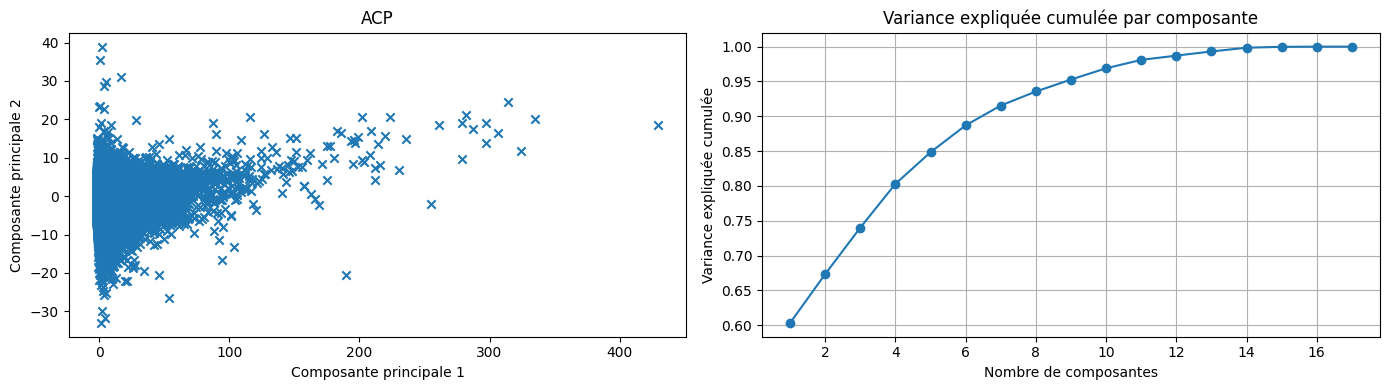

In [120]:
# les features intéressantes pour grouper les equity
features_clustering = ['mean_return', 'std_return', 'var_return', 'momentum_10', 'momentum_20',
                      'acceleration', 'volatility_ratio', 'day_sin', 'day_cos', 'day_bin',
                      'Moyenne mobile 5d', 'Moyenne mobile 10d', 'Vol mobile 5d', 'Vol mobile 10d',
                       'Momentum mobile 5d', 'Momentum mobile 10d', 'Vol ratio 10d']

#normaliser les données de la maniere qui fait le plus sens économiquement
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(data[features_clustering])

# PCA
pca_full = PCA()
X_train_pca = pca_full.fit_transform(X_train_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# variance expliquée et nuage de points
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker="x")
axes[0].set_title("ACP")
axes[0].set_xlabel('Composante principale 1')
axes[0].set_ylabel('Composante principale 2')

axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
axes[1].set_xlabel('Nombre de composantes')
axes[1].set_ylabel('Variance expliquée cumulée')
axes[1].set_title("Variance expliquée cumulée par composante")
axes[1].grid(True)
plt.tight_layout()
plt.show()

On explique 90% de la variance avec 7 composantes.

#### HDBSCAN

On groupe les equity selon certaines features qui nous semblent intéressantes (les mêmes qu'au dessus) et on applique un modèle HDBSCAN pour calculer le nombre de cluster optimal et comment répartir les equity par cluster.

In [121]:
# aggréger les features choisies par : la moyenne, le std, quantile 75% et quantile 25%
aggregated = data.groupby('equity')[features_clustering].agg(['mean', 'std', lambda x: x.quantile(0.25),
                                                              lambda x: x.quantile(0.75)])

# renommer bien les colonnes
aggregated.columns = [f"{col[0]}_{col[1] if isinstance(col[1], str) else 'q'+str(int(col[1](None)*100))}"
                      for col in aggregated.columns]
std_cols = [col for col in aggregated.columns if '_std' in col]
aggregated[std_cols] = aggregated[std_cols].fillna(0)

# Standardisation de la manière qui fait le plus sens économiquement
scaler = RobustScaler()
X_scaled = scaler.fit_transform(aggregated)

# création des clusters
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
aggregated['cluster'] = clusterer.fit_predict(X_scaled)
print("Nombre d'equities par cluster :")
print(aggregated['cluster'].value_counts(dropna=False))

c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Nombre d'equities par cluster :
cluster
 2    1396
-1     285
 3      77
 0      18
 1      15
Name: count, dtype: int64


- La grande majorité des actions est regroupée dans le groupe 2. Le groupe 3 peut aussi être intéressant au vu du nombre d'actions dedans.
- D'après la documentation HDBSCAN, "any point not in a selected cluster is simply a noise point (and assigned the label -1)". On a donc 286 points qui ne sont pas bien classés.
- On va vérifier ces résultats avec un clustering par K-means ensuite pour pouvoir interpréter.


Visualisation de nos clustering : on utilise une ACP pour réduire la dimension du problème et pouvoir visualiser nos clusters en 2D.

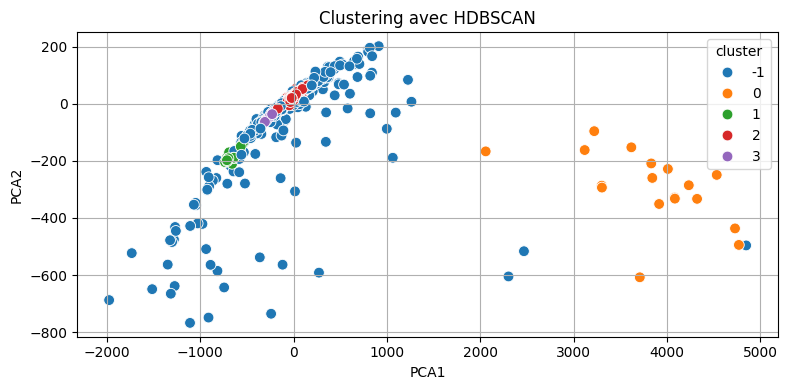

In [122]:
# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
aggregated['PCA1'] = X_pca[:, 0]
aggregated['PCA2'] = X_pca[:, 1]

# afficher clustering
plt.figure(figsize=(8, 4))
sns.scatterplot(data=aggregated, x='PCA1', y='PCA2', hue='cluster', palette='tab10', s=60)
plt.title("Clustering avec HDBSCAN")
plt.grid(True)
plt.tight_layout()
plt.show()

- Hormis le groupe 0, les clusters se chevauchent, ce qui n'est pas très concluant.
- Finalement, le groupe 3 n'est pas forcément très intéressant car il est très proche du groupe 2. Ce serait plutot le groupe 0 qui est intéressant, car il est très séparé du reste, donc le clustering se fait bien (on a bien un pattern de trading très différent pour ces actions là).

#### KMEANS

On essaye de clusteriser suivant la même logique, mais cette fois ci en utilisant un modèle K means.

In [123]:
available_features = [f for f in features_clustering if f in data.columns]
# moyenne par equity
equity_features = data.groupby("equity")[available_features].mean().reset_index()

# normaliser les données par la bonne méthode
X = equity_features.drop(columns=["equity"])
scaler = RobustScaler()
X_scaled_Kmeans = scaler.fit_transform(X)

# ACP
pca_kmeans = PCA(n_components=9)
X_pca = pca_kmeans.fit_transform(X_scaled_Kmeans)

On vérifie le nombre optimal de clusters avec la méthode du coude.

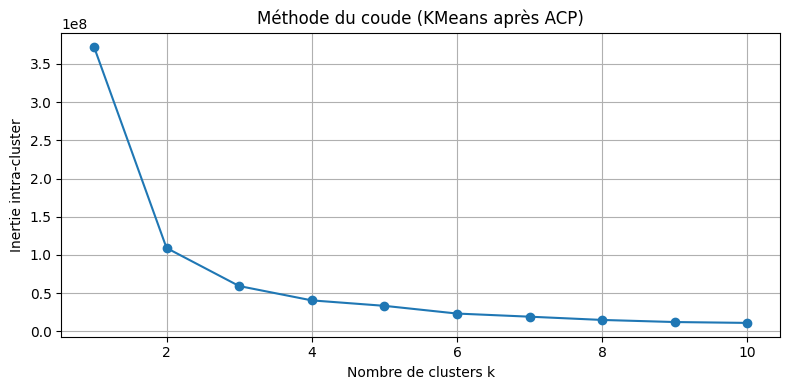

In [124]:
# Méthode du coude
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude (KMeans après ACP)")
plt.grid(True)
plt.tight_layout()
plt.show()

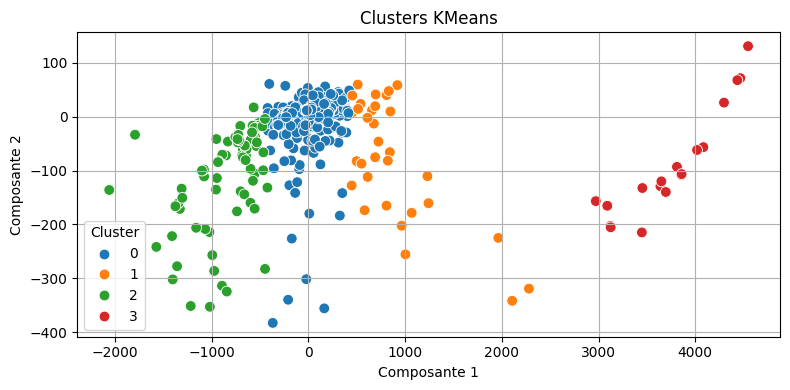

In [125]:
# création des clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # nombre de clusters = 4, donné par le coude
clusters = kmeans.fit_predict(X_pca)            #clusters sur PCA
equity_features['cluster'] = clusters

# visualiser
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', s=60)
plt.title("Clusters KMeans")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [126]:
compter_equity = equity_features['cluster'].value_counts().sort_index()
pourcentage_equity = (compter_equity / compter_equity.sum()) * 100
resultat_equity= pd.DataFrame({'Nombre d\'actions': compter_equity, "Pourcentage(%)": pourcentage_equity.round(2)})
print(resultat_equity)

         Nombre d'actions  Pourcentage(%)
cluster                                  
0                    1665           92.96
1                      34            1.90
2                      74            4.13
3                      18            1.01


- La grande majorité des equities sont concentrées dans un cluster. Cela signifie que les equities du dataset ont un comportement proche. Economiquement, cela signifie que les actions du marché américain évoluent de manière similaire pour la grande majorité, ce qui n'est pas forcément étonnant.

- Les 4 clusters sont quand même bien séparés sur le graphique, ce qui veut dire qu'ils expliquent bien des comportements de trading différents. Le clustering fonctionne mieux qu'avec HDBSCAN.

Maintenant qu'on a classé les actions par clusters, on ajoute cette information comme une feature dans notre dataset. On choisi de prendre les clusters créés par Kmeans, car ils sont plus concluants qu'avec HDBSCAN, et semblent apporter plus d'information.

In [127]:
data = data.merge(equity_features[['equity', 'cluster']], on='equity', how='left')

## Clusters d'equities sur les rendements

On test un clustering sur les rendements pour voir si ça peut apporter des informations supplémentaires.
Cela revient à clusteriser les equity en fonction de leurs rendements, et non pas en fonction des features.

On utilise un K means.

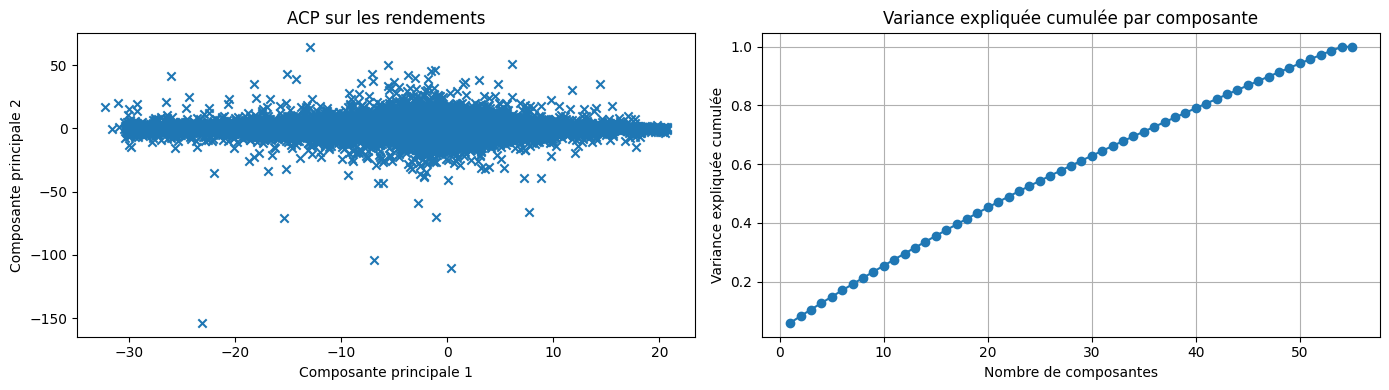

In [128]:
# colonnes de rendements
rendement_cols = [col for col in data.columns if col.startswith("r")]

# normaliser les rendements
scaler_rendement = RobustScaler()
X_rendement_scaled = scaler_rendement.fit_transform(data[rendement_cols])

# ACP
pca_rendement = PCA()
X_rendement_pca = pca_rendement.fit_transform(X_rendement_scaled)
cumulative_variance_rendement = np.cumsum(pca_rendement.explained_variance_ratio_)

# variance expliquée et ACP
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].scatter(X_rendement_pca[:, 0], X_rendement_pca[:, 1], marker="x")
axes[0].set_title("ACP sur les rendements")
axes[0].set_xlabel('Composante principale 1')
axes[0].set_ylabel('Composante principale 2')

axes[1].plot(range(1, len(cumulative_variance_rendement) + 1),
             cumulative_variance_rendement, marker='o')
axes[1].set_xlabel('Nombre de composantes')
axes[1].set_ylabel('Variance expliquée cumulée')
axes[1].set_title("Variance expliquée cumulée par composante")
axes[1].grid(True)
plt.tight_layout()
plt.show()

On détermine le nombre de clusters optimaux via la méthode du coude.

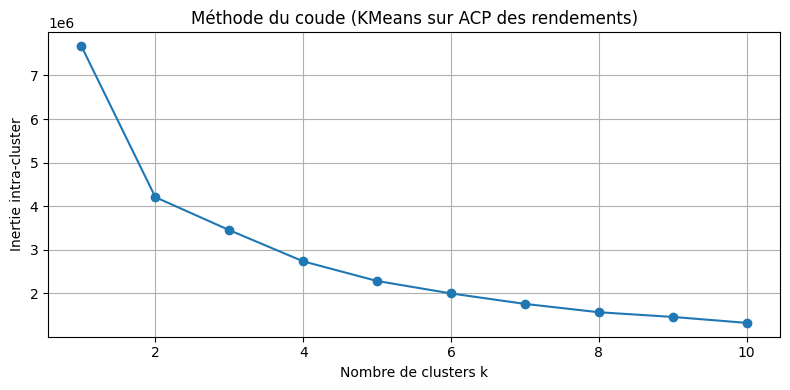

In [129]:
inertia_rendement = []
K_rendement = range(1, 11)
for k in K_rendement:
    kmeans_rendement = KMeans(n_clusters=k, random_state=42)
    kmeans_rendement.fit(X_rendement_pca[:, :2])
    inertia_rendement.append(kmeans_rendement.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_rendement, inertia_rendement, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude (KMeans sur ACP des rendements)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\arian\AppData\Local\Temp\ipykernel_9888\3185930843.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\arian\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


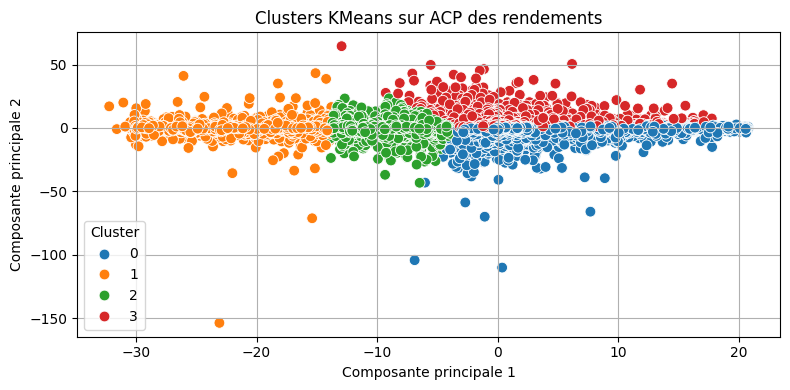

In [130]:
#KMEANS avec 4 clusters (trouvé via methode du coude)
kmeans_final_rendement = KMeans(n_clusters=4, random_state=42)
clusters_rendement = kmeans_final_rendement.fit_predict(X_rendement_pca[:, :2])

# visualiser les clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_rendement_pca[:, 0], y=X_rendement_pca[:, 1],hue=clusters_rendement, palette='tab10', s=60)
plt.title("Clusters KMeans sur ACP des rendements")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [131]:
compter_rendement = pd.Series(clusters_rendement).value_counts().sort_index()
pourcentage_rendement = (compter_rendement / compter_rendement.sum()) * 100

resultat_rendement = pd.DataFrame({'Cluster': compter_rendement.index,
  'Nombre d\'equity dans le cluster': compter_rendement.values,
  'Pourcentage(%)': pourcentage_rendement.round(2).values})

resultat_rendement = resultat_rendement.set_index("Cluster")
print("\nRépartition des clusters de rendements")
print(resultat_rendement)


Répartition des clusters de rendements
         Nombre d'equity dans le cluster  Pourcentage(%)
Cluster                                                 
0                                 459320           65.00
1                                   6788            0.96
2                                  24062            3.41
3                                 216490           30.64


- On trouve 4 clusters, comme quand on a clusterisé les equity par leurs features. C'est donc cohérent.
- La répartition par clusters est meilleure que dans la clusterisation par features.
- On ajoute ce classement comme une feature de notre dataframe.

In [132]:
data['cluster_rendement'] = clusters_rendement

# Normalisation, séparation du dataset

- On sépare les données pour avoir 80% de train et 20% de validation (appelé test ici).
- On fait en sorte qu'aucune equity du test se retrouve dans le test.

In [133]:
from sklearn.model_selection import train_test_split

# grouper par equity
equity_target = (data.groupby("equity")["reod"]
  .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
  .reset_index())

# split le train en 80% train + 20%test, avec aucune equity similaire entre les 2
equities_train, equities_test = train_test_split(equity_target,
    test_size=0.2, random_state=42, stratify=equity_target["reod"])

train = data[data["equity"].isin(equities_train["equity"])].copy()
test = data[data["equity"].isin(equities_test["equity"])].copy()

- On normalise (dans le train et le test) nos features et nos rendements, en utilisant RobustScaler qui permet de ne pas trop écraser les queues de distribution épaisses (pour ne pas perdre l'information économique que les valeurs extrêmes nous apportent).
- On représente graphiquement la distribution des rendements.

In [134]:
features_normalisation = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8',
       'r9', 'r10', 'r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18',
       'r19', 'r20', 'r21', 'r22', 'r23', 'r24', 'r25', 'r26', 'r27', 'r28',
       'r29', 'r30', 'r31', 'r32', 'r33', 'r34', 'r35', 'r36', 'r37', 'r38',
       'r39', 'r40', 'r41', 'r42', 'r43', 'r44', 'r45', 'r46', 'r47', 'r48',
       'r49', 'r50', 'r51', 'r52', 'mean_return',
       'median_return', 'std_return', 'var_return', 'range_return',
       'trend_last_5', 'trend_first_5', 'trend_diff', 'momentum_10',
       'momentum_20', 'acceleration', 'volatility_ratio', 'day_sin', 'day_cos',
       'day_bin', 'Moyenne mobile 5d', 'Moyenne mobile 10d', 'Vol mobile 5d',
       'Vol mobile 10d', 'Momentum mobile 5d', 'Momentum mobile 10d','Vol ratio 10d',]
scaler = RobustScaler()
train[features_normalisation] = scaler.fit_transform(train[features_normalisation])
test[features_normalisation] = scaler.transform(test[features_normalisation])

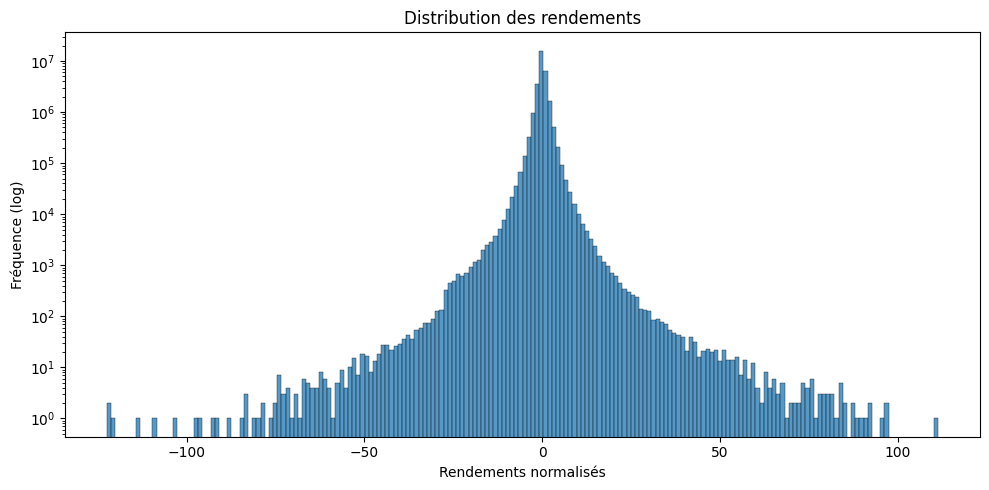

In [135]:
rendement_cols = [col for col in train.columns if col.startswith("r") and col != "reod"]
# mettre tous les rendements en une seule série
rendements_norm = train[rendement_cols].stack().dropna()

plt.figure(figsize=(10, 5))
sns.histplot(rendements_norm, bins=200, kde=False)
plt.yscale('log')  # échelle log
plt.title("Distribution des rendements")
plt.xlabel("Rendements normalisés")
plt.ylabel("Fréquence (log)")
plt.tight_layout()
plt.show()

La distribution des rendements présente toujours des queues de distribution épaisses et une asymétrie négative (skewness < 0), ce qui signifie qu'il y a une fréquence plus élevée des fortes baisses que des fortes hausses. Même en normalisant on n'a pas perdu les caractéristiques de notre distribution.



In [136]:
# Définition de la variable cible (y) et des features (X)
train_x = train.drop(columns=['reod'])  # Toutes les colonnes sauf la cible
train_y = train['reod']  # Cible

test_x = test.drop(columns=['reod'])  # Toutes les colonnes sauf la cible
test_y = test['reod']  # Cible

train_x = train_x.sample(frac=0.1, random_state=42)  # 10% des données
train_y = train_y.loc[train_x.index]

train_x.fillna(train_x.median(), inplace=True)

In [137]:
# Décaler les classes de `+1` pour éviter les valeurs négatives
train_y = train_y + 1
test_y= test_y + 1

# Entrainement avec modele non supervisé

Par curiosité, on regarde si les clusters d'equities que nous avons créés précédemment, permettent de bien prédire la variable reod.

In [ ]:
#ACP
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(train_x)

# clustering sur le jeu d'entraînement
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_train = kmeans.fit_predict(X_train_pca)

# associer à chaque cluster la moyenne de la cible 'reod'
df_train = pd.DataFrame(X_train_pca, index=train_x.index)
df_train['cluster'] = clusters_train
df_train['reod'] = train_y
map_reod = df_train.groupby('cluster')['reod'].mean().to_dict()

# appliquer sur le test
X_test_pca = pca.transform(test_x)
clusters_test = kmeans.predict(X_test_pca)
df_test = pd.DataFrame(X_test_pca, index=test_x.index)
df_test['cluster'] = clusters_test
df_test['reod'] = test_y
df_test['reod_pred_continu'] = df_test['cluster'].map(map_reod)


def to_class(x):
    if x <= 0.5:
        return 0
    elif 1.5 > x > 0.5:
        return 1
    elif x >= 1.5:
        return 2

df_test['reod_pred'] = df_test['reod_pred_continu'].apply(to_class)

# Évaluation
y_true = df_test['reod'].astype(int)
y_pred = df_test['reod_pred'].astype(int)
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy du modèle 'KMeans + moyenne par cluster' (test set) : {acc:.4f}")
print(df_test[['reod', 'reod_pred', 'cluster']].head())

Accuracy du modèle 'KMeans + moyenne par cluster' (test set) : 0.3591
   reod  reod_pred  cluster
0     1          1        1
1     1          1        1
2     0          1        1
3     1          1        1
4     1          1        1


L'accuracy obtenue avec les clusters d'equities n'est pas très bonne. On garde quand même la feature créée grâce au clustering dans notre dataset, car ça pourra peut être être utile pour les modèles supervisés.

# Sélection du modèle supervisé

Nous allons tester plusieurs modèles de classification sur nos données d'entrainement pour trouver celui qui maximisera la précision de notre prediction.

In [140]:
def evaluate_model(model, train_x, train_y, test_x, test_y, cv=5):
    # Entraîner le modèle
    model.fit(train_x, train_y)

    # Prédictions
    y_pred = model.predict(test_x)

    # Évaluation des performances (classification)
    accuracy = accuracy_score(test_y, y_pred)
    class_report = classification_report(test_y, y_pred, output_dict=True)

    # Validation croisée avec scoring "accuracy"
    cv_scores = sk.model_selection.cross_val_score(model, train_x, train_y, cv=cv, scoring='accuracy')
    mean_cv_acc = cv_scores.mean()  # Moyenne des accuracy de la validation croisée

    result = { "Model": model.__class__.__name__,
        "Test Accuracy": accuracy,
        "Mean CV Accuracy": mean_cv_acc,
        "Classification Report": class_report }

    print(f"Accuracy: {accuracy:.4f}, Mean CV Accuracy: {mean_cv_acc:.4f}\n")
    return result

In [141]:
# Liste des modèles à tester
models = {
    "XGBoost": XGBClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight="balanced",solver="saga"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    #"SVC": SVC(kernel="rbf", C=1.0, class_weight="balanced"),
    #"Gradient Boosting" :GradientBoostingClassifier(),
}

# Tester chaque modèle
results = {}
for name, model in models.items():
    print(f"{name}")
    result = evaluate_model(model, train_x, train_y, test_x, test_y)
    results[name] = result


XGBoost
Accuracy: 0.4970, Mean CV Accuracy: 0.4979

Logistic Regression


c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

Accuracy: 0.4166, Mean CV Accuracy: 0.4179

Decision Tree
Accuracy: 0.3873, Mean CV Accuracy: 0.3833

Random Forest
Accuracy: 0.4440, Mean CV Accuracy: 0.4447



- Xg Boost : Accuracy: 0.4970, Mean CV Accuracy: 0.4979
- Logistic regression : Accuracy: 0.4166, Mean CV Accuracy: 0.4179
- Decision Tree : Accuracy: 0.3882, Mean CV Accuracy: 0.3842
- Random Forest : Accuracy: 0.444, Mean CV Accuracy: 0.4447
- Gradient Boosting : Accuracy: 0.4764, Mean CV Accuracy: 0.4771
- SVC : Accuracy: 0.3246, Mean CV Accuracy: 0.3307

Les modèles SVC et Gradient Boosting sont commentés dans le code car ils mettent 4 heures à tourner. Les résultats obtenus sont reportés ci dessus.

Dans cette tâche de classification à 3 classes (où une prédiction aléatoire aurait 33% de chances de tomber juste), les modèles testés ont des performances variés.

- XGBoost donne les meilleurs résultats avec une accuracy de 49,7%. Cela  indique qu’il parvient à capter une structure intéressante dans les données. Ce score est significativement supérieur au hasard.

- Gradient Boosting (47,6%) et Random Forest (44,4%) sont également assez performants. ce qui confirme que les modèles d'ensemble sont bien adaptés pour traiter des données complexes et potentiellement bruitées.

- La régression logistique, avec 41,7% de précision, reste correcte mais limitée, car elle repose sur des hypothèses de linéarité qui peuvent ne pas convenir à nos données.

- L’arbre de décision n'est pas bon.

- Le SVC atteint seulement 32,5% : c’est le modèle le moins performant, et surtout le plus long à entraîner.


Le modèle XGBoost prédit des valeurs avec la précision la plus importante, donc nous allons choisir ce modèle pour nos prédictions.


 Maintenant, nous optimisons les hyperparamètres du modèle XGBoost, grâce à Optuna. Au lieu de tester au hasard (GridSearch), Optuna prend en compte les essais précédents pour affiner la recherche.

In [145]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10)}

    model = xgb.XGBClassifier( **params,use_label_encoder=False,
        eval_metric='logloss', random_state=42, verbosity=0)        #log loss adapté car la répartition de notre variable cible est équilibrée (environ 30% pour chaque classe)

    model.fit(train_x, train_y)
    preds = model.predict(test_x)
    return accuracy_score(test_y, preds)

In [143]:
import optuna

In [147]:
# seed fixe pour obtenir toujours les memes resultats
sampler = optuna.samplers.TPESampler(seed=42)

# optuna pour l'optimisation des hyperparamètres
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=10)

print("Meilleurs paramètres :", study.best_params)
print("Meilleure précision sur validation :", study.best_value)

[I 2025-04-11 22:37:03,598] A new study created in memory with name: no-name-c8c4d68b-0e64-4ad8-b128-6bb72ed3f389
C:\Users\arian\AppData\Local\Temp\ipykernel_9888\4057548597.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\arian\AppData\Local\Temp\ipykernel_9888\4057548597.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Users\arian\AppData\Local\Temp\ipykernel_9888\4057548597.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

Meilleurs paramètres : {'n_estimators': 164, 'learning_rate': 0.14447746112718687, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.836965827544817, 'colsample_bytree': 0.6185801650879991, 'reg_alpha': 0.26926469100861794, 'reg_lambda': 0.004809461967501573}
Meilleure précision sur validation : 0.4958688337765236


In [149]:
from sklearn.model_selection import StratifiedKFold

On passe les meilleurs paramètres trouvés par Optuna, au modèle.

In [150]:
# Meilleurs paramètres trouvés par Optuna
best_params = {
    'n_estimators': 164,
    'learning_rate': 0.14447746112718687,
    'max_depth': 4,
    'min_child_weight': 6,
    'subsample':0.836965827544817,
    'colsample_bytree': 0.6185801650879991}

#fixer la seed ici aussi
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#seed dans le modele aussi
model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(train_x, train_y)

# Prédictions de notre variable output
y_pred = model.predict(test_x)

# calcul de l'accuracy
accuracy = accuracy_score(test_y, y_pred)
class_report = classification_report(test_y, y_pred, output_dict=True)

# validation croisée avec scoring "accuracy"
cv_scores = sk.model_selection.cross_val_score(model, train_x, train_y, cv=cv, scoring='accuracy')
mean_cv_acc = cv_scores.mean()         # Moyenne des accuracy de la validation croisée

result = { "Model": model.__class__.__name__,
          "Test Accuracy": accuracy,
           "Mean CV Accuracy": mean_cv_acc,
           "Classification Report": class_report }

print(f"Accuracy: {accuracy:.4f}, Mean CV Accuracy: {mean_cv_acc:.4f}\n")

c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:05] WARNING: C:\actio

Accuracy: 0.4953, Mean CV Accuracy: 0.4920



On obtient une accuracy de 0.495 sur notre dataset de test. Nous avions également utilisé Randomized Search pour optimiser les hyperparamètres, mais il prenait trop de temps à tourner donc nous l'avons supprimé.
L'accuracy est supérieure à celle du benchmark du data challenge.

Nous voulons vérifier que le modèle n'est pas overfitté, donc nous vérifions l'accuracy sur notre set d'entrainement.

In [151]:
train_pred = model.predict(train_x)
train_accuracy = accuracy_score(train_y, train_pred)

print("Précision sur Train :", train_accuracy)

Précision sur Train : 0.5833810170946284


L'accuracy est légèrement plus élevée par rapport au test, ce qui est bon signe.

Cependant, nous avons plus de 80 features, et nous nous demandons si elles sont toutes pertinentes. Nous allons refaire le modèle, mais en ne sélectionnant que les 40 meilleurs features, pour voir si cela améliore la prédiction.

In [152]:
model = xgb.XGBClassifier(**best_params,  random_state=42) # on crée un nouveau modèle avec les meilleurs paramètres
model.fit(train_x, train_y)

importances = pd.Series(model.feature_importances_, index=train_x.columns)
top_k = 40  # Nombre de features à sélectionner
selected_features = importances.sort_values(ascending=False).head(top_k).index

train_x_selected = train_x[selected_features]
test_x_selected = test_x[selected_features]

In [153]:
models = {    "XGBoost": xgb.XGBClassifier(random_state=42)}
results = {}
for name, model in models.items():
    print(f"{name}")
    result = evaluate_model(model, train_x_selected, train_y, test_x_selected, test_y)
    results[name] = result

XGBoost
Accuracy: 0.5035, Mean CV Accuracy: 0.5023



Sur le dataset de test, l'accuracy est améliorée avec ce modèle (0.503 contre 0.495), même si cela reste léger. Nous vérifions à nouveau sur notre data set d'entrainement.

In [154]:
train_pred = model.predict(train_x_selected)
train_accuracy = accuracy_score(train_y, train_pred)

print("Accuracy sur Train :", train_accuracy)

Accuracy sur Train : 0.7498390673056291


On obtient une accuracy de 0.74, ce qui est élevé et présente un risque d'overfitting. Cela est peut être dû au fait qu'on a diminué le nombre de features. Nous allons optimiser les hyperparamètres pour essayer de recalibrer le modèle et corriger l'overfitting.

In [155]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10) }

    model = xgb.XGBClassifier(**params,use_label_encoder=False,
        eval_metric='logloss', random_state=42,verbosity=0  )

    model.fit(train_x_selected, train_y)
    preds = model.predict(test_x_selected)
    return accuracy_score(test_y, preds)

In [156]:
# seed fixée
sampler = optuna.samplers.TPESampler(seed=42)

# optuna pour l'optimisation des hyperparamètres
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=10)

print("Meilleurs paramètres :", study.best_params)
print("Meilleure précision sur validation :", study.best_value)

[I 2025-04-11 22:48:30,072] A new study created in memory with name: no-name-de4a41df-ed5c-451f-a1af-8d5905ef3500
C:\Users\arian\AppData\Local\Temp\ipykernel_9888\4030353148.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\arian\AppData\Local\Temp\ipykernel_9888\4030353148.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Users\arian\AppData\Local\Temp\ipykernel_9888\4030353148.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

Meilleurs paramètres : {'n_estimators': 164, 'learning_rate': 0.14447746112718687, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.836965827544817, 'colsample_bytree': 0.6185801650879991, 'reg_alpha': 0.26926469100861794, 'reg_lambda': 0.004809461967501573}
Meilleure précision sur validation : 0.5019333043902968


In [157]:
#on passe les meilleurs paramètres trouvés par Optuna
best_params = {
    'n_estimators': 164,
    'learning_rate': 0.14447746112718687,
    'max_depth': 4,
    'min_child_weight': 6,
    'subsample': 0.836965827544817,
    'colsample_bytree': 0.6185801650879991}

#seed
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Création du modèle avec les meilleurs paramètres
model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(train_x_selected, train_y)

# Prédictions
y_pred = model.predict(test_x_selected)

# calcul de l'accuracy
accuracy = accuracy_score(test_y, y_pred)
class_report = classification_report(test_y, y_pred, output_dict=True)

# Validation croisée
cv_scores = sk.model_selection.cross_val_score(model, train_x_selected, train_y, cv=cv, scoring='accuracy')
mean_cv_acc = cv_scores.mean()  # Moyenne des accuracy de la validation croisée

result = { "Model": model.__class__.__name__,
          "Test Accuracy": accuracy,
           "Mean CV Accuracy": mean_cv_acc,
           "Classification Report": class_report }

print(f"Accuracy: {accuracy:.4f}, Mean CV Accuracy: {mean_cv_acc:.4f}\n")

c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:26] WARNING: C:\actio

Accuracy: 0.5019, Mean CV Accuracy: 0.4978



In [158]:
train_pred = model.predict(train_x_selected)
train_accuracy = accuracy_score(train_y, train_pred)

print("Précision sur Train :", train_accuracy)

Précision sur Train : 0.5701308919247551


Le nouveau modèle avec XgBoost, appliqué uniquement sur les meilleures features, et avec hyperparamètres optimisés, obtient une accuracy de 0.57 sur le train contre 0.502 sur le test.

L'accuracy pour le set de test est largement supérieure au benchmark. De plus, l'accuracy sur le train est très proche de l'accurcay du set de test, donc on a réussi à régler le problème d'overfitting grâce à la calibration des hyperparamètres. Nous estimons que ce modèle est le meilleur que nous avons testé, et c'est celui ci que nous retenons.